In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 4787 images belonging to 33 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_split/val',
                                            target_size = (64, 64))

Found 657 images belonging to 33 classes.


In [ ]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(33, activation='softmax') 
])

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=32,epochs=150,callbacks=[history])

Epoch 1/150
150/150 [==============================] - 1474s 10s/step - loss: 3.1776 - accuracy: 0.1251 - val_loss: 2.8330 - val_accuracy: 0.1842
Epoch 2/150
150/150 [==============================] - 48s 318ms/step - loss: 2.5715 - accuracy: 0.2649 - val_loss: 2.5190 - val_accuracy: 0.3014
Epoch 3/150
150/150 [==============================] - 48s 321ms/step - loss: 2.1907 - accuracy: 0.3687 - val_loss: 2.2780 - val_accuracy: 0.3607
Epoch 4/150
150/150 [==============================] - 49s 324ms/step - loss: 1.9884 - accuracy: 0.4272 - val_loss: 2.0958 - val_accuracy: 0.4231
Epoch 5/150
150/150 [==============================] - 48s 320ms/step - loss: 1.8384 - accuracy: 0.4644 - val_loss: 1.9379 - val_accuracy: 0.4353
Epoch 6/150
150/150 [==============================] - 48s 319ms/step - loss: 1.7145 - accuracy: 0.5024 - val_loss: 1.9688 - val_accuracy: 0.4627
Epoch 7/150
150/150 [==============================] - 48s 316ms/step - loss: 1.6411 - accuracy: 0.5212 - val_loss: 1.9503 -

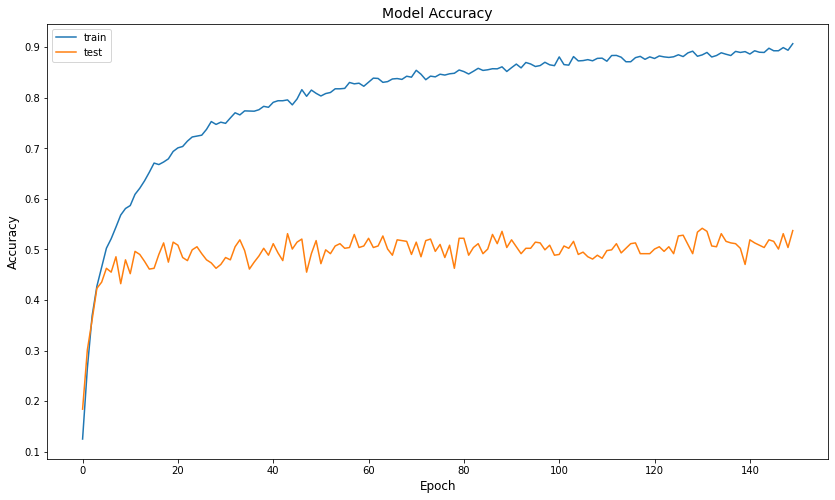

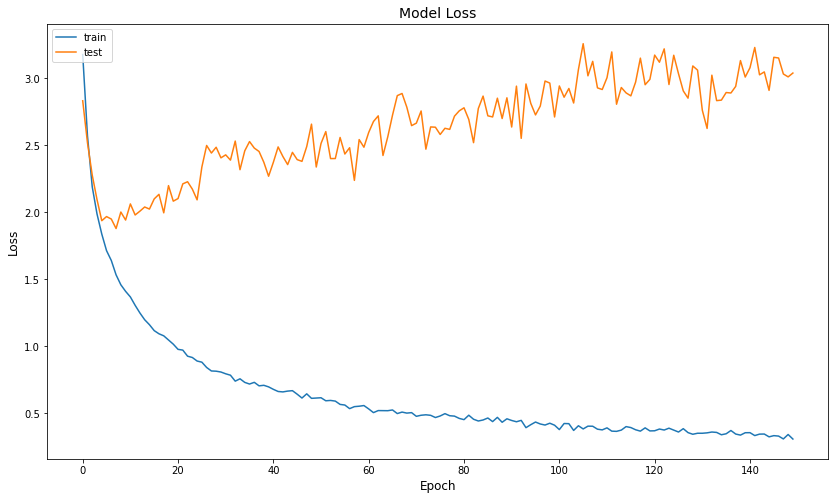

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

21/21 [==============================] - 4s 192ms/step - loss: 3.0396 - accuracy: 0.5373
n Test_Accuracy:- 0.5372906923294067
confusion matrix
[[19  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  2]]


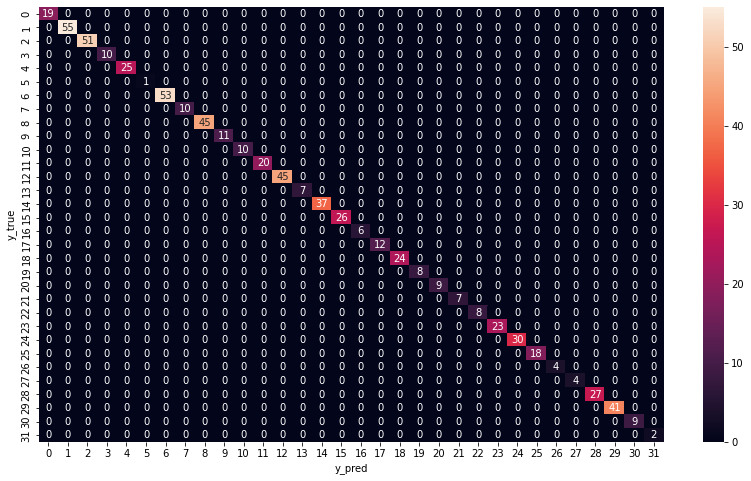

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
test_set.reset()

In [ ]:
preds = model.predict(test_set)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_set, preds))

ValueError: ignored

#CNN test 15 class

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Split3/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 10980 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_Split3/val',
                                            target_size = (64, 64))

Found 1270 images belonging to 15 classes.


In [ ]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax') 
])

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=32,epochs=150,callbacks=[history])

Epoch 1/150
344/344 [==============================] - 2956s 9s/step - loss: 2.0192 - accuracy: 0.3509 - val_loss: 1.9013 - val_accuracy: 0.3992
Epoch 2/150
344/344 [==============================] - 111s 321ms/step - loss: 1.5293 - accuracy: 0.5132 - val_loss: 1.9264 - val_accuracy: 0.4102
Epoch 3/150
344/344 [==============================] - 111s 322ms/step - loss: 1.3302 - accuracy: 0.5710 - val_loss: 1.7237 - val_accuracy: 0.4583
Epoch 4/150
344/344 [==============================] - 111s 321ms/step - loss: 1.2136 - accuracy: 0.6127 - val_loss: 1.6961 - val_accuracy: 0.5087
Epoch 5/150
344/344 [==============================] - 111s 322ms/step - loss: 1.1466 - accuracy: 0.6339 - val_loss: 1.5961 - val_accuracy: 0.5055
Epoch 6/150
344/344 [==============================] - 110s 321ms/step - loss: 1.0766 - accuracy: 0.6584 - val_loss: 1.6652 - val_accuracy: 0.4819
Epoch 7/150
344/344 [==============================] - 110s 320ms/step - loss: 1.0202 - accuracy: 0.6722 - val_loss: 1.5

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=32,epochs=150,callbacks=[history])

Epoch 1/150
344/344 [==============================] - 4175s 12s/step - loss: 2.0057 - accuracy: 0.3600 - val_loss: 2.0110 - val_accuracy: 0.3890
Epoch 2/150
344/344 [==============================] - 105s 305ms/step - loss: 1.5411 - accuracy: 0.5060 - val_loss: 1.8049 - val_accuracy: 0.4449
Epoch 3/150
344/344 [==============================] - 104s 303ms/step - loss: 1.3396 - accuracy: 0.5704 - val_loss: 1.7390 - val_accuracy: 0.4457
Epoch 4/150
344/344 [==============================] - 105s 304ms/step - loss: 1.2277 - accuracy: 0.6099 - val_loss: 1.7851 - val_accuracy: 0.4630
Epoch 5/150
344/344 [==============================] - 104s 302ms/step - loss: 1.1430 - accuracy: 0.6375 - val_loss: 1.6446 - val_accuracy: 0.5016
Epoch 6/150
344/344 [==============================] - 108s 313ms/step - loss: 1.0762 - accuracy: 0.6617 - val_loss: 1.6179 - val_accuracy: 0.5244
Epoch 7/150
344/344 [==============================] - 106s 307ms/step - loss: 1.0392 - accuracy: 0.6699 - val_loss: 1.

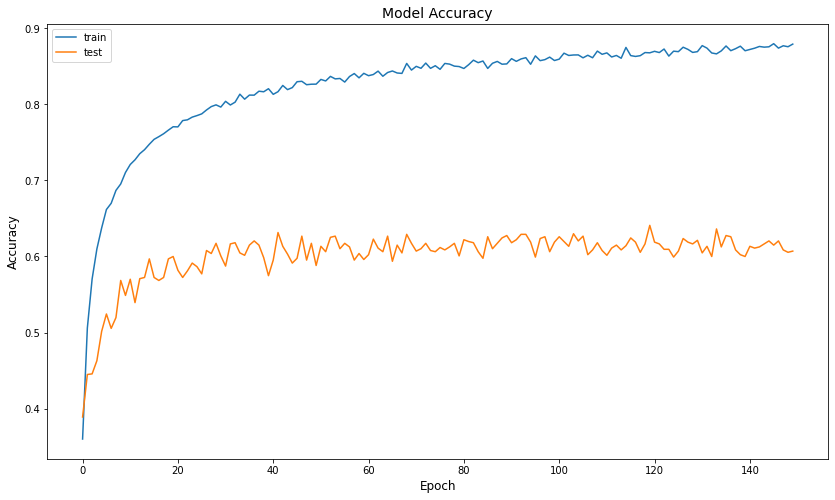

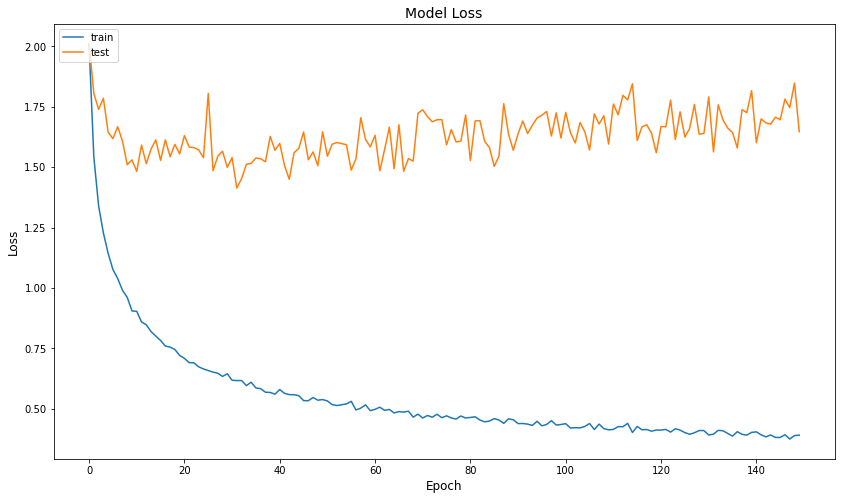

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

40/40 [==============================] - 8s 201ms/step - loss: 1.6470 - accuracy: 0.6071
n Test_Accuracy:- 0.6070865988731384
confusion matrix
[[121   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  58   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  36   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 169   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  84   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  69   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 165   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 153   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  48   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  61   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  81   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  49   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  73   0   0]
 [  0   0   0   0   0   0   0   0   0 

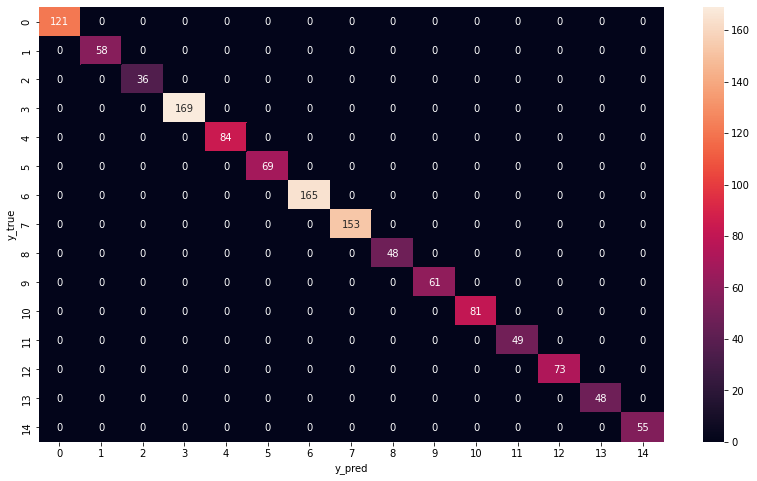

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()